The goal is to find the characteristics that contribute to the price of an apartment and create an alarm which sends 
an automated email if an apartment comes up with a lower price than it should be.

In [1]:
# Imports collected here
import sys, os
from time import sleep, time
import datetime
from random import random
from IPython.display import Image, display
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import scrapy
from scrapy import Selector
import numpy as np
import pandas as pd

# Set screenshot path
ROOT_DIR = os.path.dirname(os.path.abspath('DataGathering.ipynb'))
path = os.path.join(os.path.sep, ROOT_DIR,'Screenshots'+ os.sep)



In [2]:
# Initialize browser session and settings
WINDOW_SIZE = "1920, 1080"

chromeOptions = webdriver.ChromeOptions()
chromeOptions.add_argument('--headless')
chromeOptions.add_argument('--no-sandbox')
chromeOptions.add_argument('--disable-dev-shm-usage')
chromeOptions.add_argument(f"--window-size={WINDOW_SIZE}")

browser = webdriver.Chrome(options=chromeOptions)

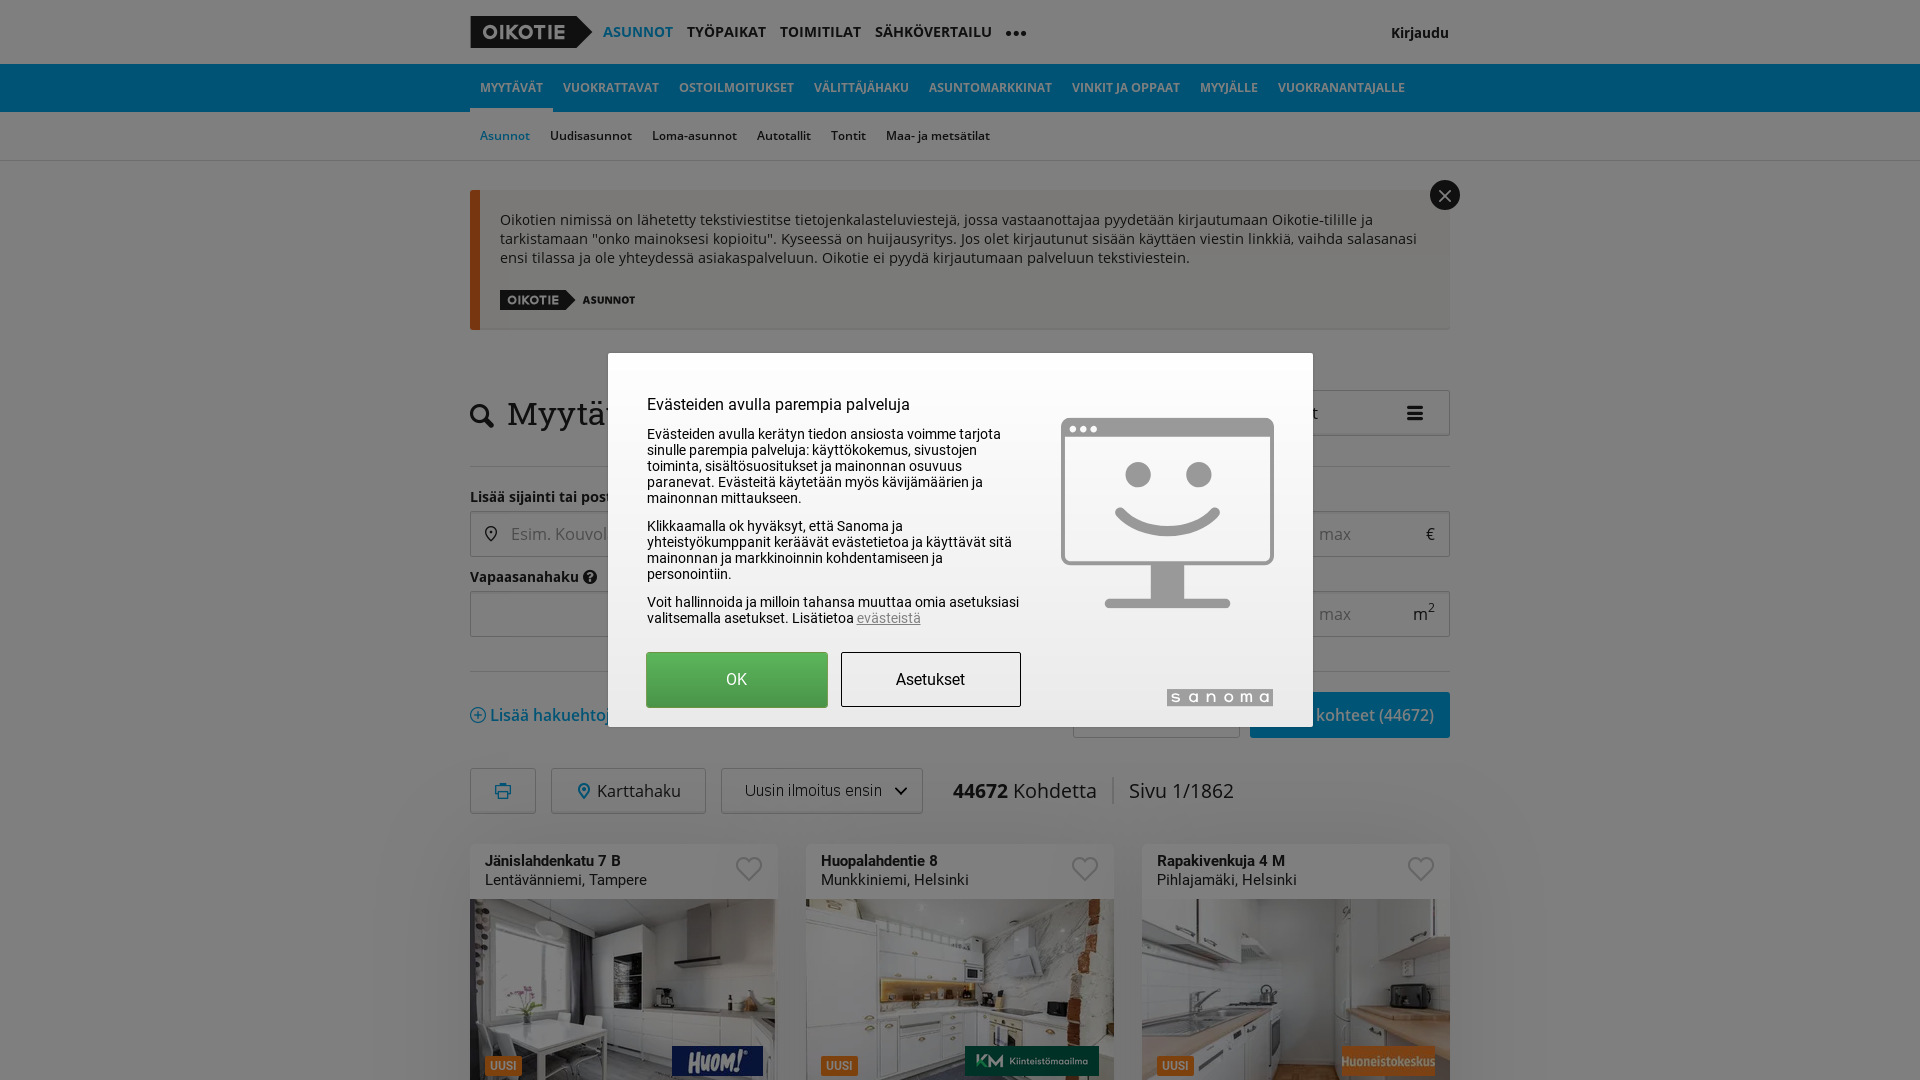

In [3]:
# Go to oikotie.fi
browser.get('https://asunnot.oikotie.fi/myytavat-asunnot')
sleep(2)

browser.save_screenshot(path + 'test1.png')
Image(filename=path + 'test1.png') 

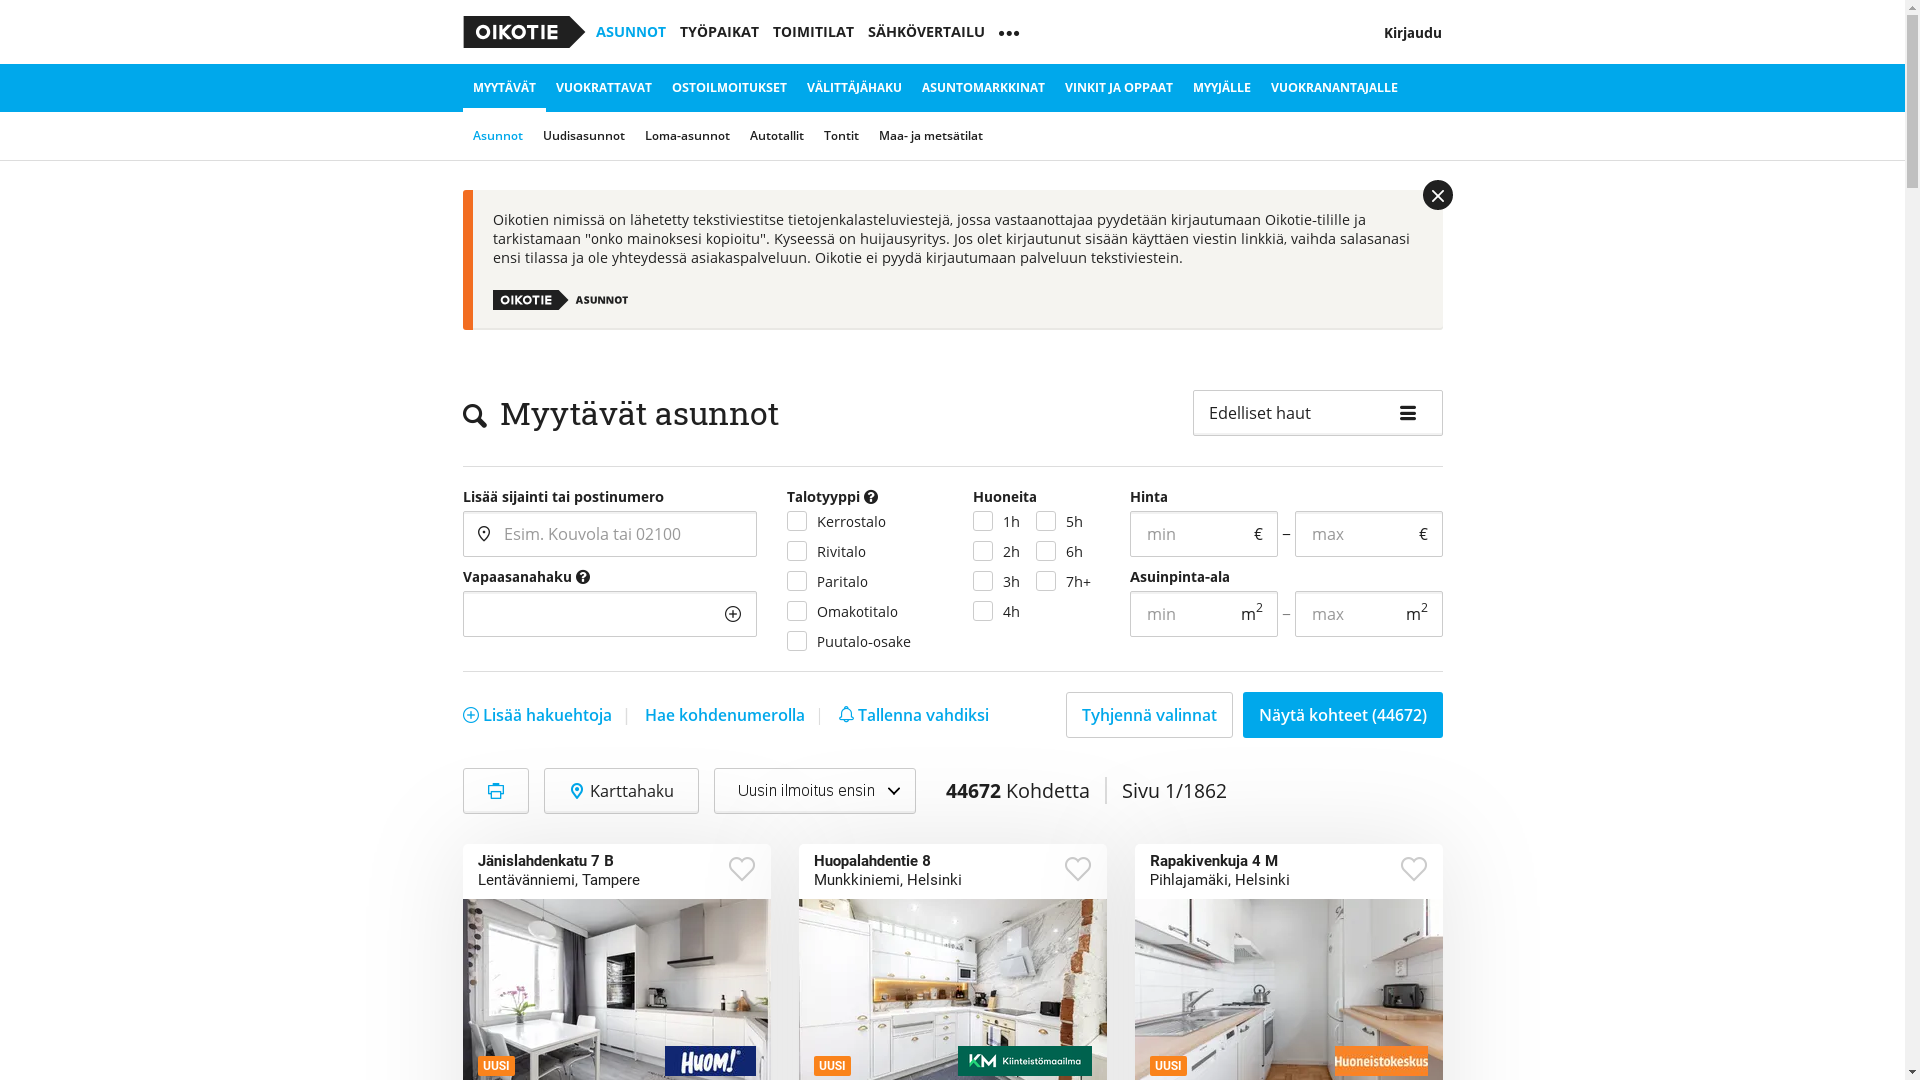

In [4]:
# Click that cookies are OK
cookiesOk = browser.find_element_by_xpath('//*[@id="sccm-opt-out-c1"]')
cookiesOk.click()

sleep(2+random())

browser.save_screenshot(path + 'test2.png')
Image(filename=path + 'test2.png') 

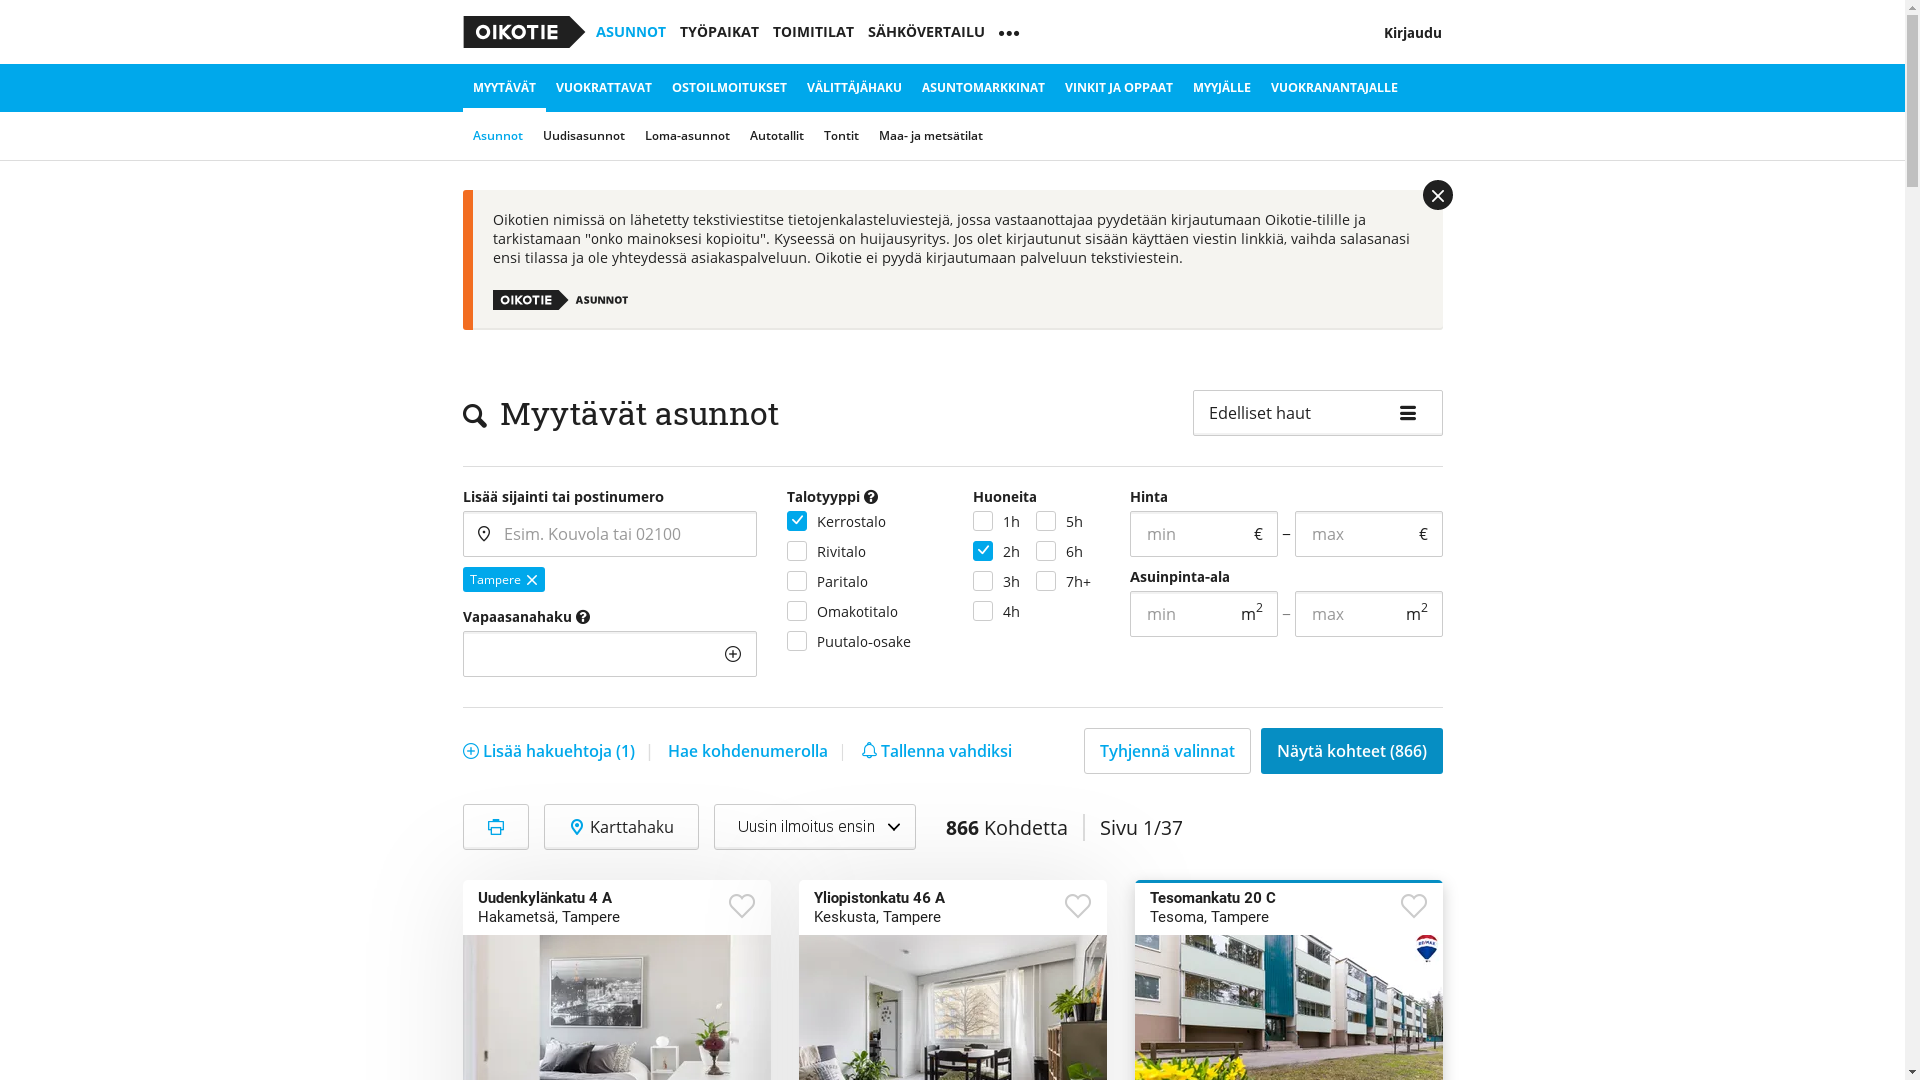

In [5]:
# Assign search parameters
LOCATION = "Tampere"
TWO_ROOMS = True
APARTMENT_BUILDINGS = True
SAUNA = False
OWNERSHIP = True

# Set location
locationInput = browser.find_element_by_xpath('//*[@id="autocomplete2-input"]')
locationInput.send_keys(LOCATION)
sleep(random())
locationInput.send_keys(Keys.RETURN)
sleep(1+random())

# Set other search parameters
if TWO_ROOMS:
    twoRooms = browser.find_element_by_xpath("//label[text()='2h']")
    twoRooms.click()
    sleep(random())
    
if APARTMENT_BUILDINGS:
    apBuilding = browser.find_element_by_xpath("//label[text()='Kerrostalo']")
    apBuilding.click()
    sleep(random())
    
if SAUNA or OWNERSHIP:                                      
    moreOptions = browser.find_element_by_xpath("//span[text()='Lisää hakuehtoja']")
    moreOptions.click()
    sleep(1+random())
    
    if SAUNA:
        sauna = browser.find_element_by_xpath("//label[text()='Sauna']")
        sauna.click()
        sleep(random())
    
    if OWNERSHIP:
        ownership = browser.find_element_by_xpath("//label[text()='Omistus']")
        ownership.click()
        sleep(random())
    
    
# Show search results
showResults = browser.find_element_by_xpath("//button[contains(text(), 'Näytä kohteet')]")
showResults.click()

sleep(2+random())

browser.save_screenshot(path + 'test3.png')
Image(filename=path + 'test3.png') 

In [6]:
# Save all links to the search results
all_links = []
i = 0
start = time()
while True:
    scrapy_selector = Selector(text = browser.page_source)
    apartments_selector = scrapy_selector.xpath("//a[contains(@href, 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/')]")
    all_links += apartments_selector.xpath('@href').getall()
    
    next_button = browser.find_element_by_xpath("//button/span[contains(text(), 'Seuraava')]/..")
    
    try:
        disabled = scrapy_selector.xpath("//button/span[contains(text(), 'Seuraava')]/..").attrib['disabled']
    
    except:
        disabled = False
    
    i += 1
    print("Page " + str(i))
      
    if disabled:
        print("reached end")
        break
    
    if i > 50:
        print("reached end by indexing")
        break
    
    next_button.click()
    sleep(3+random())
    

print('Theres a total of ' + str(len(all_links)) + ' links.')

print("Time elapsed: " + str(time()-start) + " seconds") 

all_links_df = pd.DataFrame(data=all_links)
all_links_df


Page 1
Page 2
Page 3
Page 4
Page 5
Page 6
Page 7
Page 8
Page 9
Page 10
Page 11
Page 12
Page 13
Page 14
Page 15
Page 16
Page 17
Page 18
Page 19
Page 20
Page 21
Page 22
Page 23
Page 24
Page 25
Page 26
Page 27
Page 28
Page 29
Page 30
Page 31
Page 32
Page 33
Page 34
Page 35
Page 36
Page 37
reached end
Theres a total of 866 links.
Time elapsed: 143.31308674812317 seconds


,0
0,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
1,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
2,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
3,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
4,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
...,...
861,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
862,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
863,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
864,https://asunnot.oikotie.fi/myytavat-asunnot/ta...


In [7]:
# Go through all the pages and save results to an array

data_array = np.zeros([len(all_links), 24], dtype=object)
i = 0

start = time()

for url in all_links:
    browser.get(url)
    sleep(0.5+random())

    ApSelector = Selector(text = browser.page_source)

    location = ApSelector.xpath("//h1[contains(@class, 'listing-header__headline--secondary')]/span[contains(@class, 'listing-header__text')]/text()").get()
    
    location_area = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Kaupunginosa')]/following-sibling::dd/a/span/text()").get()
    
    if location_area is None:
        location_area = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Kaupunginosa')]/following-sibling::dd/text()").get()
    
    price_sales = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Myyntihinta')]/following-sibling::dd/text()").get()
    price_no_debt = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Velaton hinta')]/following-sibling::dd/text()").get()
    area = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Asuinpinta-ala')]/following-sibling::dd/text()").get()
    price_per_sq = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Neliöhinta')]/following-sibling::dd/text()").get()
    charge_finance = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Rahoitusvastike')]/following-sibling::dd/text()").get()
    charge_maintenance = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Hoitovastike')]/following-sibling::dd/text()").get()
    charge_total = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Yhtiövastike')]/following-sibling::dd/text()").get()
    other_expenses = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Muut kustannukset')]/following-sibling::dd/text()").get()
    floor = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Kerros')]/following-sibling::dd/text()").get()
    rooms = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Huoneiston kokoonpano')]/following-sibling::dd/text()").get()
    rooms_amount = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Huoneita')]/following-sibling::dd/text()").get()
    free_by_date = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Lisätietoa vapautumisesta')]/following-sibling::dd/text()").get()
    balcony = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Parveke')]/following-sibling::dd/text()").get()
    bathroom_equipment = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Kylpyhuoneen varusteet')]/following-sibling::dd/text()").get()
    sauna = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Asunnossa sauna')]/following-sibling::dd/text()").get()
    sauna_in_building = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Taloyhtiössä sauna')]/following-sibling::dd/text()").get()
    storage_room = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Säilytystilat')]/following-sibling::dd/text()").get()
    views = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Näkymät')]/following-sibling::dd/text()").get()
    renovations_upcoming = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Tulevat remontit')]/following-sibling::dd/text()").get()
    renovations_done = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Tehdyt remontit')]/following-sibling::dd/text()").get()
    
    
    text_list = ApSelector.xpath("//div[contains(@class, 'listing-overview')]/p/text()")
    description_text = ""
    for x in text_list:
        description_text += x.get()

    

    data_array[i] = [url, 
                     location, 
                     location_area,
                     price_sales, 
                     price_no_debt,
                     area,
                     price_per_sq,
                     charge_finance,
                     charge_maintenance,
                     charge_total,
                     other_expenses,
                     floor,
                     rooms,
                     rooms_amount,
                     free_by_date,
                     balcony,
                     bathroom_equipment,
                     sauna,
                     sauna_in_building,
                     storage_room,
                     views,
                     renovations_upcoming,
                     renovations_done,
                     description_text
                    ]
    
    i += 1
    print(i)

print("Time elapsed: " + str(time()-start) + " seconds") 
    
df = pd.DataFrame(data=data_array)

browser.close()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [8]:
# Set up dataframe settings
df.columns = ["URL",
           "Osoite", 
           "Alue", 
           "Myyntihinta", 
           "Velaton hinta", 
           "Pinta-ala", 
           "Neliöhinta", 
           "Rahoitusvastike",
           "Hoitovastike",
           "Yhtiövastike",
           "Muut kustannukset",
           "Kerros",
           "Huonekokoonpano",
            "Huoneet",
           "Vapautuminen",
           "Parveke",
           "Kylpyhuoneen varusteet",
           "Sauna",
           "Taloyhtiössä sauna",
           "Säilytystilat",
           "Näkymät",
           "Tulevat remontit",
           "Tehdyt remontit",
           "Infoteksti"
          ]



In [9]:
# Show dataframe and save it to .csv and .xls
display(df)

today = datetime.date.today()
today_str = str(today)
csv_path = os.path.join(os.path.sep, ROOT_DIR,'resultfiles'+ os.sep +"apartments" + today_str + ".csv")
xls_path = os.path.join(os.path.sep, ROOT_DIR,'resultfiles'+ os.sep +"apartments" + today_str + ".xlsx")

print(csv_path)

df.to_csv(csv_path, sep=";", encoding='utf-8')
df.to_excel(xls_path, encoding='utf-8')

,URL,Osoite,Alue,Myyntihinta,Velaton hinta,Pinta-ala,Neliöhinta,Rahoitusvastike,Hoitovastike,Yhtiövastike,...,Vapautuminen,Parveke,Kylpyhuoneen varusteet,Sauna,Taloyhtiössä sauna,Säilytystilat,Näkymät,Tulevat remontit,Tehdyt remontit,Infoteksti
0,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Uudenkylänkatu 4 A, Hakametsä, Tampere",Hakametsä,"160 709,62 €",174 000 €,"53,5 m²","3 252,34 € / m","66,61 € / kk","142,45 € / kk","209,06 € / kk",...,sopimuksen mukaan,Kyllä,"Pesutilojen kuvaus: Wc-istuin, suihku, pesukon...",Ei,None,None,None,Hallituksen korjaussuunnitelman mukaan: 09/201...,1989 E-talon katon vesieristeiden uusinta. 199...,"HUOM!! Nyt vapautumassa kolmannen kerroksen, v..."
1,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Yliopistonkatu 46 A, Keskusta, Tampere",Keskusta,"168 858,62 €",179 900 €,"46,5 m²","3 868,82 € / m","64,88 € / kk","142,60 € / kk","211,42 € / kk",...,Myydään vuokrattuna,Kyllä,"Kylpyhuone, suihku, suihkuseinä, peilit, kaapi...",Ei,None,"Kaapistoja, kellarikomero",Ikkunat Yliopistonkadulle,Suunnitellut: Suunnitellut kunnossapito ja muu...,2008 vesikaton saneraus ja porrashuoneisden ku...,Nyt myynnissä loistopaikan koti Sorsapuiston l...
2,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Tesomankatu 20 C, Tesoma, Tampere",Tesoma,91 000 €,91 000 €,"58,5 m²","1 555,56 € / m","140,72 € / kk","191,81 € / kk","332,53 € / kk",...,max 3 kk kaupanteon jälkeen,Kyllä,"Varustus: pesukoneliitäntä, lattialämmitys, wc...",Ei,None,"vaatehuone, kellarikomero",None,2019-2021 Alkuperäisten 6 kpl huippuimureiden ...,1992 Julkisivuelementtien saumaus 2001 Julkisi...,"Olen valoisa ylimmän kerroksen koti, joka etsi..."
3,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Härmälänkatu 23 B, Rantaperkiö, Tampere",Rantaperkiö,"75 535,67 €",108 000 €,48 m²,2 250 € / m,"201,60 € / kk",None,"211,20 € / kk",...,None,Kyllä,"Varustus: pesukoneliitäntä, wc-istuin, suihku,...",Ei,None,kellarikomero,None,- Huopakaton kunnon seuranta - Energiaselvitys...,"1993 lukot uusittu,1995 vesikatto,bitumi,rappu...",Rantaperkiössä Härmälän rajalla hyväkuntoinen ...
4,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Kuninkaankatu 33, Keskusta, Tampere",Keskusta,185 000 €,185 000 €,53 m²,"3 490,57 € / m",None,"127,20 € / kk","127,20 € / kk",...,Asunto on vuokrattu. irtisanomisaika 6 kk.,Kyllä,None,None,None,None,None,Vesikatteen uusiminen sisältäen pelti- ja kerm...,"Hissien saneeraus 1989-91, Huopakaton korjaus ...",Ydinkeskustassa viidennen kerroksen kaksio.\nE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Tiporaitti 9 C, Santalahti, Tampere",Santalahti,"61 999,44 €",206 500 €,44 m²,"4 693,18 € / m","92,14 € / kk",220 € / kk,None,...,Arvioitu valmistuminen helmikuu/2020,Kyllä,"Pesutilojen kuvaus: Varustus: suihkuseinä, pei...",Ei,None,"Kuvaus: Kellarivarasto, vaatehuone, kaapistot",None,None,None,MUUTTOVALMIS uuden Santalahden alueen ensimmäi...
862,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Tiporaitti 9 C, Santalahti, Tampere",Santalahti,"60 198,35 €",199 900 €,44 m²,"4 543,18 € / m","89,08 € / kk","202,40 € / kk",None,...,Arvioitu valmistuminen helmikuu/2020,Kyllä,"Pesutilojen kuvaus: Varustus: suihkuseinä, pei...",Ei,None,"Kuvaus: Kellarivarasto, vaatehuone, kaapistot",None,None,None,MUUTTOVALMIS uuden Santalahden alueen ensimmäi...
863,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Lintuhytinkatu 7 B 23, Lintuhytti, Tampere",Lintuhytti,"53 156,45 €",137 000 €,39 m²,"3 512,82 € / m","56,55 € / kk","152,49 € / kk","209,04 € / kk",...,Heti,Kyllä,"Kylpyhuone, suihku, peili, allaskaappi, pesuko...",Ei,None,"Kaapistot, ulkovarasto","pihalle, kadulle",-,-,ENÄÄ KAKSI ASUNTOA MYYMÄTTÄ. KYSY VÄLITTÄJÄLTÄ...
864,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Runkokatu 6, Haukiluoma, Tampere",Haukiluoma,"77 148,35 €",85 000 €,51 m²,"1 666,67 € / m","27,54 € / kk","207,06 € / kk","234,60 € / kk",...,Vuokrattu.,Kyllä,"KPH: suihk

/home/jupyter/JodaAIPlatformEnv/resultfiles/apartments2020-04-25.csv
